In [1]:
#LOADING LIBRARIES
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#LOADING DATASET
files_simu = [
    './Bc2JpsiDst_Kpipi0/2011_MagDown.root', 
    './Bc2JpsiDst_Kpipi0/2011_MagUp.root',
    './Bc2JpsiDst_Kpipi0/2012_MagDown.root',
    './Bc2JpsiDst_Kpipi0/2012_MagUp.root',
    './Bc2JpsiDst_Kpipi0/2015_MagDown.root',
    './Bc2JpsiDst_Kpipi0/2015_MagUp.root',
    './Bc2JpsiDst_Kpipi0/2016_MagUp.root',
    './Bc2JpsiDst_Kpipi0/2017_MagDown.root',
    './Bc2JpsiDst_Kpipi0/2017_MagUp.root',
    './Bc2JpsiDst_Kpipi0/2018_MagDown.root',
    './Bc2JpsiDst_Kpipi0/2018_MagUp.root'
]

simu_data = uproot.concatenate(files_simu, cut = 'Bc_BKGCAT==0', library='pd')
simu_data['delta_mass'] = simu_data['Dst_M'] - simu_data['D0_M']

simu_bckg_data = uproot.concatenate(files_simu, cut = 'Bc_BKGCAT==70', library='pd')
simu_bckg_data['delta_mass'] = simu_bckg_data['Dst_M'] - simu_bckg_data['D0_M']

/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_2688/1992107381.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simu_data['delta_mass'] = simu_data['Dst_M'] - simu_data['D0_M']
/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_2688/1992107381.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simu_bckg_data['delta_mass'] = simu_bckg_data['Dst_M'] - simu_bckg_data['D0_M']


In [4]:
#PRESELECTION
THE_BIG_SELECTION_Kpi = (
    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(delta_mass > 139) & (delta_mass < 151) & '
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.) &'
    '(Dst_ENDVERTEX_CHI2 < 9.) &'
    'abs(Dst_M - 2010.) < 40. &'
    'Dst_PT > 2700. &'
    'pi_soft_PT > 250. &'
    'pi_soft_TRACK_CHI2NDOF < 2. &'
    'pi_soft_TRACK_GhostProb < 0.4 &'
    'Bc_ENDVERTEX_CHI2 < 4.2 &'
    'Bc_IPCHI2_OWNPV < 10. &'
    'Bc_DIRA_OWNPV > 0.99'
)

THE_BIG_SELECTION = (
    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(delta_mass > 139) & (delta_mass < 151) & '
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & '
    '(K_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.) &'
    '(Dst_ENDVERTEX_CHI2 < 9.) &'
    'abs(Dst_M - 2010.) < 40. &'
    'Dst_PT > 2700. &'
    'pi_soft_PT > 250. &'
    'pi_soft_TRACK_CHI2NDOF < 2. &'
    'pi_soft_TRACK_GhostProb < 0.4 &'
    'Bc_ENDVERTEX_CHI2 < 4.2 &'
    'Bc_IPCHI2_OWNPV < 10. &'
    'Bc_DIRA_OWNPV > 0.99'
)

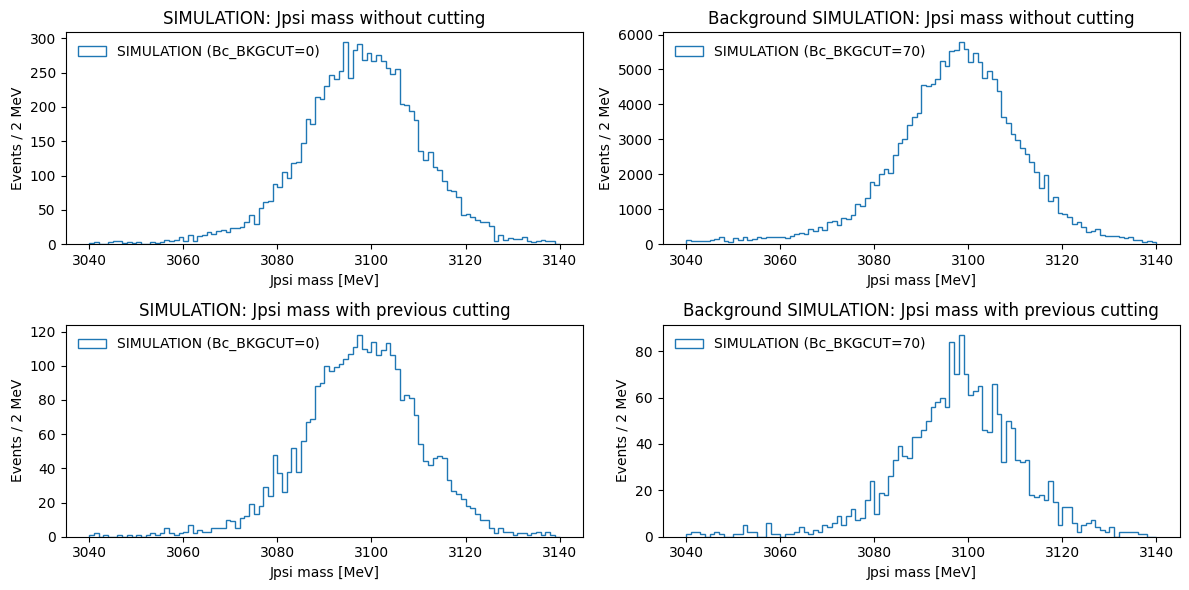

In [5]:
#J/psi MASS
#Comparing Kpi cuts for Jpsi
bin_edges = np.histogram_bin_edges(
    np.concatenate([
        simu_data['Jpsi_M'],
        simu_bckg_data['Jpsi_M'],
        simu_data.query(THE_BIG_SELECTION)['Jpsi_M'],
        simu_bckg_data.query(THE_BIG_SELECTION)['Jpsi_M']
    ]),
    bins=100,
    range=(3040, 3140)
)
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
#for Jpsi:
axes[0,0].hist(simu_data['Jpsi_M'], range=(3040, 3140), bins=bin_edges, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[0,0].set_xlabel('Jpsi mass [MeV]')
axes[0,0].set_ylabel('Events / 2 MeV')
axes[0,0].set_title('SIMULATION: Jpsi mass without cutting')
axes[0,0].legend(frameon=False)

axes[0,1].hist(simu_bckg_data['Jpsi_M'],range=(3040, 3140), bins=bin_edges, histtype='step', label='SIMULATION (Bc_BKGCUT=70)')
axes[0,1].set_xlabel('Jpsi mass [MeV]')
axes[0,1].set_ylabel('Events / 2 MeV')
axes[0,1].set_title('Background SIMULATION: Jpsi mass without cutting')
axes[0,1].legend(frameon=False)
#for cut:
axes[1,0].hist(simu_data.query(THE_BIG_SELECTION)['Jpsi_M'], bins=bin_edges, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[1,0].set_xlabel('Jpsi mass [MeV]')
axes[1,0].set_ylabel('Events / 2 MeV')
axes[1,0].set_title('SIMULATION: Jpsi mass with previous cutting')
axes[1,0].legend(frameon=False)

axes[1,1].hist(simu_bckg_data.query(THE_BIG_SELECTION)['Jpsi_M'], bins=bin_edges, histtype='step', label='SIMULATION (Bc_BKGCUT=70)')
axes[1,1].set_xlabel('Jpsi mass [MeV]')
axes[1,1].set_ylabel('Events / 2 MeV')
axes[1,1].set_title('Background SIMULATION: Jpsi mass with previous cutting')
axes[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

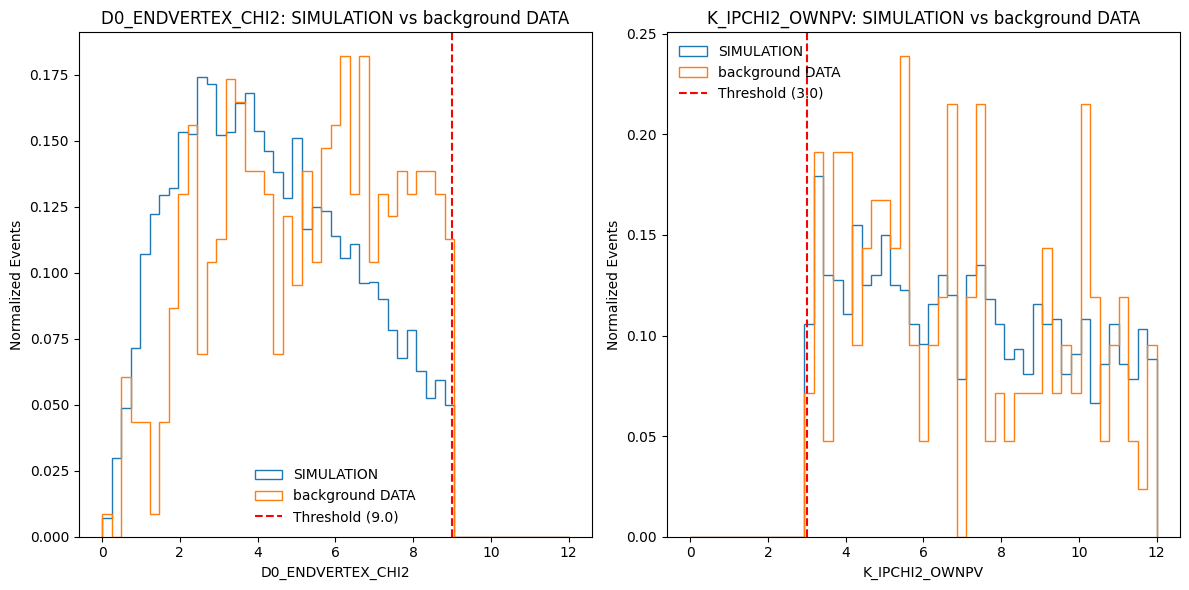

In [18]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- First plot (D0_ENDVERTEX_CHI2) ---
axes[0].hist(simu_data.query(THE_BIG_SELECTION)['D0_ENDVERTEX_CHI2'], 
             density=True, bins=bin_edges, histtype='step', range=(0, 12), label='SIMULATION')
axes[0].hist(simu_bckg_data.query(THE_BIG_SELECTION)['D0_ENDVERTEX_CHI2'], 
             density=True, bins=bin_edges, histtype='step', range=(0, 12), label='background DATA')
axes[0].axvline(x=9.0, color='red', linestyle='--', label='Threshold (9.0)')
axes[0].set_xlabel('D0_ENDVERTEX_CHI2')
axes[0].set_ylabel('Normalized Events')
axes[0].set_title('D0_ENDVERTEX_CHI2: SIMULATION vs background DATA')
axes[0].legend(frameon=False)

# --- Second plot (K_IPCHI2_OWNPV) ---
axes[1].hist(simu_data.query(THE_BIG_SELECTION)['K_IPCHI2_OWNPV'], 
             density=True, bins=bin_edges, histtype='step', range=(0, 12), label='SIMULATION')
axes[1].hist(simu_bckg_data.query(THE_BIG_SELECTION)['K_IPCHI2_OWNPV'], 
             density=True, bins=bin_edges, histtype='step', range=(0, 12), label='background DATA')
axes[1].axvline(x=3.0, color='red', linestyle='--', label='Threshold (3.0)')
axes[1].set_xlabel('K_IPCHI2_OWNPV')
axes[1].set_ylabel('Normalized Events')
axes[1].set_title('K_IPCHI2_OWNPV: SIMULATION vs background DATA')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()


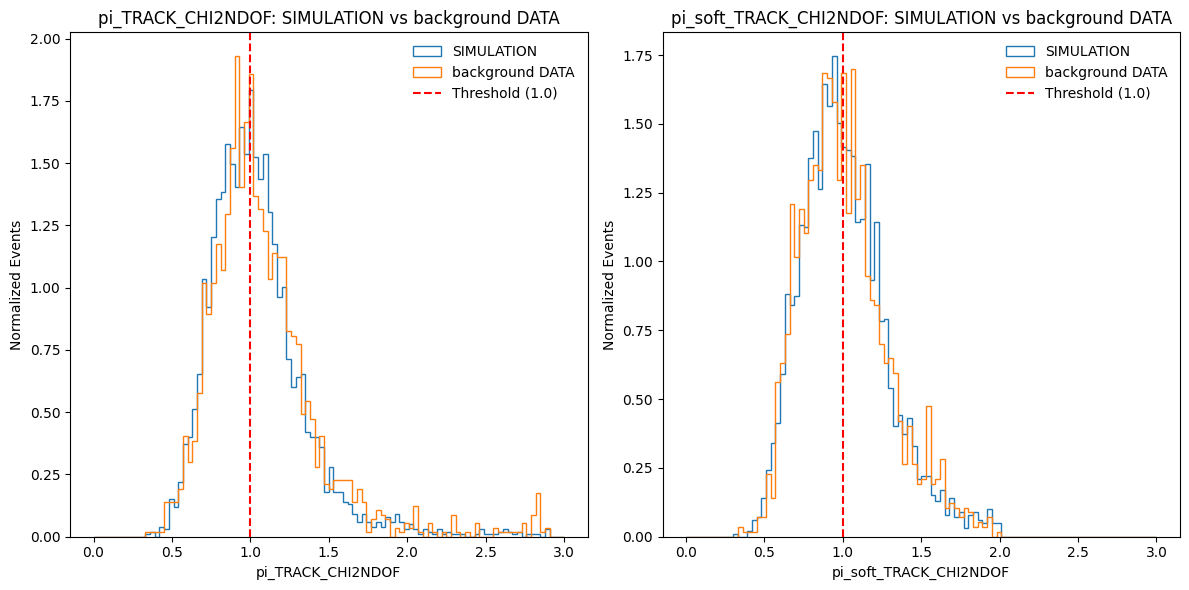

In [8]:
#FOR PIONS
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- First plot (pi_TRACK_CHI2NDOF) ---
axes[0].hist(simu_data.query(THE_BIG_SELECTION)['pi_TRACK_CHI2NDOF'], 
             density=True, bins=100, histtype='step', range=(0, 3), label='SIMULATION')
axes[0].hist(simu_bckg_data.query(THE_BIG_SELECTION)['pi_TRACK_CHI2NDOF'], 
             density=True, bins=100, histtype='step', range=(0, 3), label='background DATA')
axes[0].axvline(x=1.0, color='red', linestyle='--', label='Threshold (1.0)')
axes[0].set_xlabel('pi_TRACK_CHI2NDOF')
axes[0].set_ylabel('Normalized Events')
axes[0].set_title('pi_TRACK_CHI2NDOF: SIMULATION vs background DATA')
axes[0].legend(frameon=False)

# --- Second plot (pi_soft_TRACK_CHI2NDOF) ---
axes[1].hist(simu_data.query(THE_BIG_SELECTION)['pi_soft_TRACK_CHI2NDOF'], 
             density=True, bins=100, histtype='step', range=(0, 3), label='SIMULATION')
axes[1].hist(simu_bckg_data.query(THE_BIG_SELECTION)['pi_soft_TRACK_CHI2NDOF'], 
             density=True, bins=100, histtype='step', range=(0, 3), label='background DATA')
axes[1].axvline(x=1.0, color='red', linestyle='--', label='Threshold (1.0)')
axes[1].set_xlabel('pi_soft_TRACK_CHI2NDOF')
axes[1].set_ylabel('Normalized Events')
axes[1].set_title('pi_soft_TRACK_CHI2NDOF: SIMULATION vs background DATA')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()


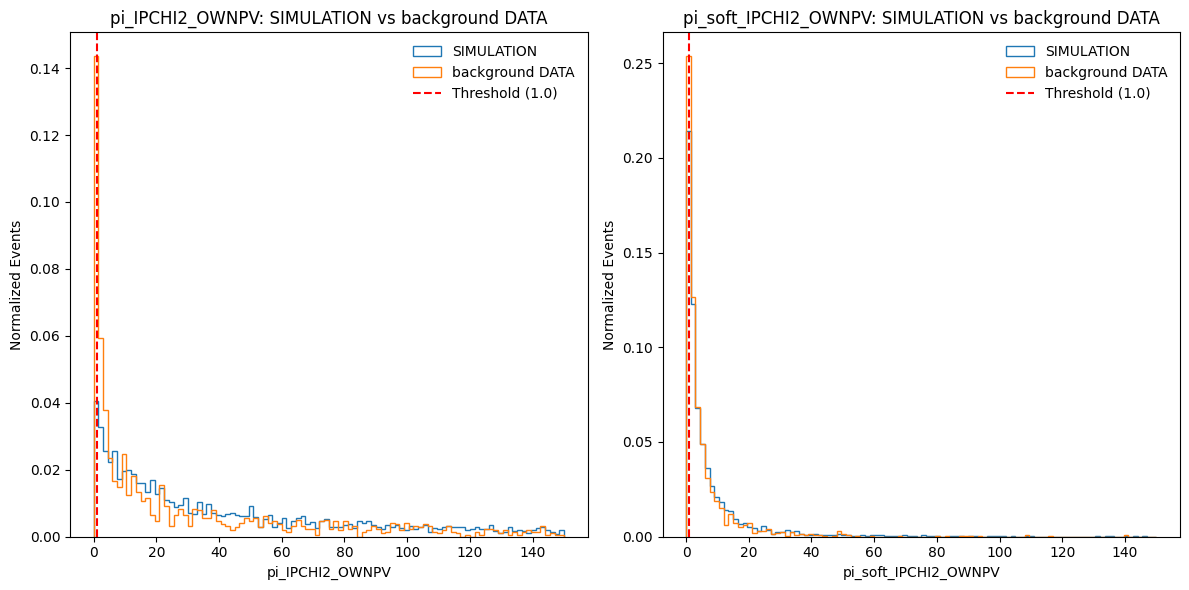

In [10]:
#FOR PIONS
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- First plot (pi_IPCHI2_OWNPV) ---
axes[0].hist(simu_data.query(THE_BIG_SELECTION)['pi_IPCHI2_OWNPV'], 
             density=True, bins=100, histtype='step', range=(0, 150), label='SIMULATION')
axes[0].hist(simu_bckg_data.query(THE_BIG_SELECTION)['pi_IPCHI2_OWNPV'], 
             density=True, bins=100, histtype='step', range=(0, 150), label='background DATA')
axes[0].axvline(x=1.0, color='red', linestyle='--', label='Threshold (1.0)')
axes[0].set_xlabel('pi_IPCHI2_OWNPV')
axes[0].set_ylabel('Normalized Events')
axes[0].set_title('pi_IPCHI2_OWNPV: SIMULATION vs background DATA')
axes[0].legend(frameon=False)

# --- Second plot (pi_soft_IPCHI2_OWNPV) ---
axes[1].hist(simu_data.query(THE_BIG_SELECTION)['pi_soft_IPCHI2_OWNPV'], 
             density=True, bins=100, histtype='step', range=(0, 150), label='SIMULATION')
axes[1].hist(simu_bckg_data.query(THE_BIG_SELECTION)['pi_soft_IPCHI2_OWNPV'], 
             density=True, bins=100, histtype='step', range=(0, 150), label='background DATA')
axes[1].axvline(x=1.0, color='red', linestyle='--', label='Threshold (1.0)')
axes[1].set_xlabel('pi_soft_IPCHI2_OWNPV')
axes[1].set_ylabel('Normalized Events')
axes[1].set_title('pi_soft_IPCHI2_OWNPV: SIMULATION vs background DATA')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

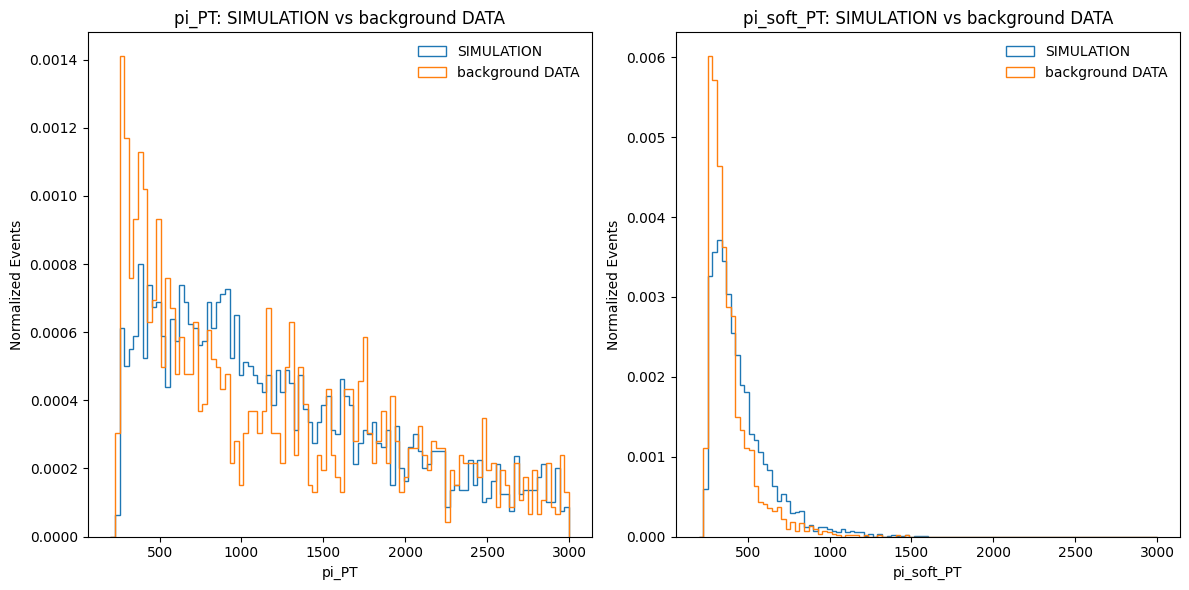

In [12]:
#FOR PIONS
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- First plot (pi_PT) ---
axes[0].hist(simu_data.query(THE_BIG_SELECTION)['pi_PT'], 
             density=True, bins=100, histtype='step', range=(200, 3000), label='SIMULATION')
axes[0].hist(simu_bckg_data.query(THE_BIG_SELECTION)['pi_PT'], 
             density=True, bins=100, histtype='step', range=(200, 3000), label='background DATA')
# axes[0].axvline(x=1.0, color='red', linestyle='--', label='Threshold (1.0)')
axes[0].set_xlabel('pi_PT')
axes[0].set_ylabel('Normalized Events')
axes[0].set_title('pi_PT: SIMULATION vs background DATA')
axes[0].legend(frameon=False)

# --- Second plot (pi_soft_PT) ---
axes[1].hist(simu_data.query(THE_BIG_SELECTION)['pi_soft_PT'], 
             density=True, bins=100, histtype='step', range=(200, 3000), label='SIMULATION')
axes[1].hist(simu_bckg_data.query(THE_BIG_SELECTION)['pi_soft_PT'], 
             density=True, bins=100, histtype='step', range=(200, 3000), label='background DATA')
# axes[1].axvline(x=1., color='red', linestyle='--', label='Threshold (1.200)')
axes[1].set_xlabel('pi_soft_PT')
axes[1].set_ylabel('Normalized Events')
axes[1].set_title('pi_soft_PT: SIMULATION vs background DATA')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()